In [42]:
var openDigger = require('../src/open_digger')

In [43]:
var query = openDigger.driver.clickhouse.query;

In [3]:
var task_1 = {
    repo: '\'openai/universe\'',
    type: '\'WatchEvent\'',
    fork_type: '\'ForkEvent\'',
    action: '\'started\'',
    star: [],
    fork: [],
    xData: [
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
    ],
    yData: [],
    colors: ['rgba(67,67,67,1)', 'rgba(115,115,115,1)'],
    labels: ['star', 'fork'],
    generateData:function(xData, yData, colors){
        // console.log(xData, yData, colors)
        bar_1 = {
              x: xData[0],
              y: yData[0],
              name: 'star',
              type: 'bar'
        }
        bar_2 = {
              x: xData[1],
              y: yData[1],
              name: 'fork',
              type: 'bar'
        }
        return [bar_1, bar_2]
    },
    generateLayout: function(xData){
        var layout = {
          title: 'star and fork from 2016 to 2021',
          barmode: 'stack',
          paper_bgcolor: 'rgba(245,246,249,1)',
          plot_bgcolor: 'rgba(245,246,249,1)',
          showlegend: true,
          annotations: []
        }
        return layout
    },
    draw: function(xData, yData, colors){
        openDigger.render.plotly(this.generateData(xData, yData, colors), this.generateLayout(xData))
    },
    get_data: async function(query_str){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        return JSON.stringify(res_data[0])
    },
    run: async function(){
        for(let _year=2016; _year<=2021; _year++){
            for(let _month=1; _month<=12; _month++){
                var date = ''+_year
                if(_month < 10){
                    date += '0' + _month
                }
                else{
                    date += _month
                }
                // console.log(date)
                var data = await this.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.action}
                   AND toYYYYMM(created_date)=${date}`
                 )
                // console.log(data)
                this.star.push(Number.parseInt(JSON.parse(data)['ct']))
                var data = await this.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.fork_type}
                   AND toYYYYMM(created_date)=${date}`
                 )
                // console.log(data)
                this.fork.push(Number.parseInt(JSON.parse(data)['ct']))
            }
        }
        // console.log(this.star)
        // console.log(this.fork)
        this.yData = [this.star, this.fork]
        this.draw(this.xData, this.yData, this.colors)
    }
}

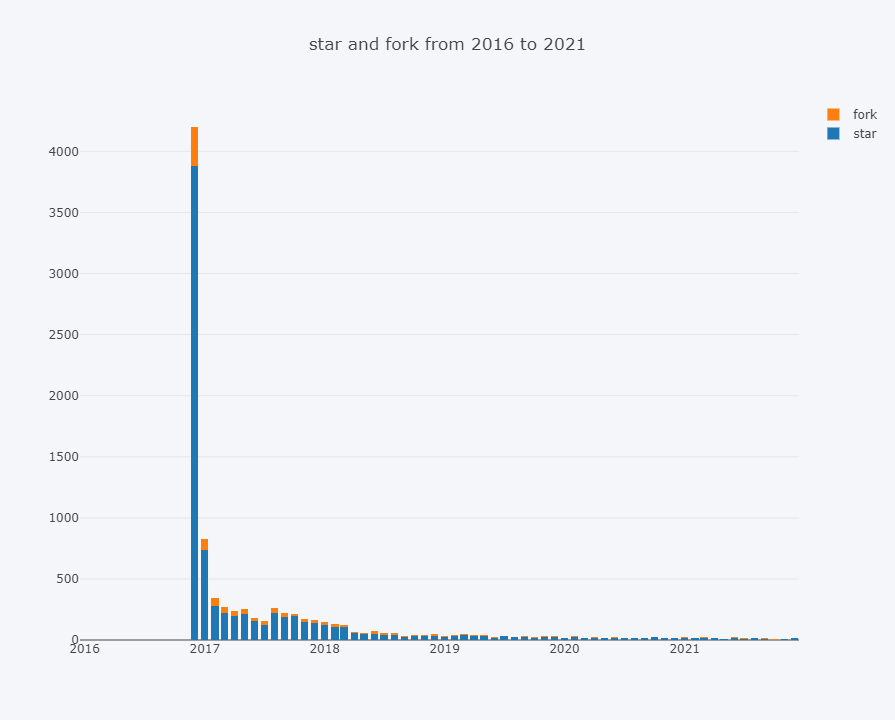

In [4]:
task_1.run()

In [5]:
async function test(){
    var data = await task_1.get_data(`SELECT *
           FROM github_log.year2016
           WHERE repo_name=${task_1.repo}
           AND type=${task_1.type}
           AND action=${task_1.action}
           LIMIT 2`
         )
    // console.log(JSON.parse(data))
}
test();

# task2

In [6]:
var task_2 = {
    repo: '\'openai/universe\'',
    type: '\'IssuesEvent\'',
    issue_open_action: '\'opened\'',
    issue_close_action: '\'closed\'',
    close_count: [],
    open_count: [],
    xData: [
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
    ],
    yData: [],
    colors: ['rgba(67,67,67,1)', 'rgba(115,115,115,1)'],
    labels: ['star', 'fork'],
    generateData:function(xData, yData, colors){
        // console.log(xData, yData, colors)
        bar_1 = {
              x: xData[0],
              y: yData[0],
              name: 'open issue',
              type: 'bar'
        }
        bar_2 = {
              x: xData[1],
              y: yData[1],
              name: 'close issue',
              type: 'bar'
        }
        return [bar_1, bar_2]
    },
    generateLayout: function(xData){
        var layout = {
          title: 'issue situation from 2016 to 2021',
          barmode: 'stack',
          paper_bgcolor: 'rgba(245,246,249,1)',
          plot_bgcolor: 'rgba(245,246,249,1)',
          showlegend: true,
          annotations: []
        }
        return layout
    },
    draw: function(xData, yData, colors){
        openDigger.render.plotly(this.generateData(xData, yData, colors), this.generateLayout(xData))
    },
    get_data: async function(query_str){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        return JSON.stringify(res_data[0])
    },
    run: async function(){
        for(let _year=2016; _year<=2021; _year++){
            for(let _month=1; _month<=12; _month++){
                var date = ''+_year
                if(_month < 10){
                    date += '0' + _month
                }
                else{
                    date += _month
                }
                // console.log(date)
                var data = await task_2.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.issue_open_action}
                   AND toYYYYMM(created_date)=${date}`
             )
                // console.log(data)
                this.open_count.push(Number.parseInt(JSON.parse(data)['ct']))
                var data = await this.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.issue_close_action}
                   AND toYYYYMM(created_date)=${date}`
                 )
                // console.log(data)
                this.close_count.push(Number.parseInt(JSON.parse(data)['ct']))
            }
        }
        // console.log(this.open_count)
        // console.log(this.close_count)
        this.yData = [this.open_count, this.close_count]
        this.draw(this.xData, this.yData, this.colors)
    }
}

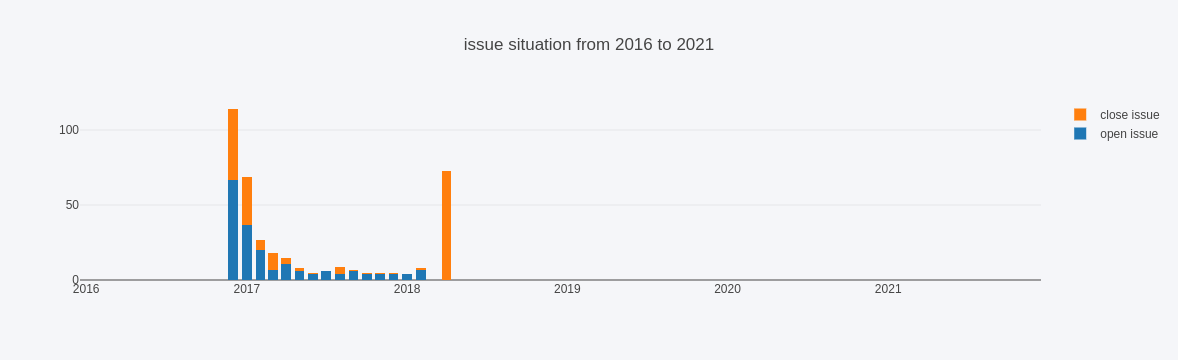

In [8]:
task_2.run()

In [8]:
async function test(){
    var _year='2016'
    var date='201612'
    var data = await task_2.get_data(`SELECT COUNT(*) AS ct
               FROM github_log.year${_year}
               WHERE repo_name=${task_2.repo}
               AND type=${task_2.type}
               AND action=${task_2.issue_open_action}
               AND toYYYYMM(created_date)=${date}`
         )
    console.log(JSON.parse(data))
}
test();

{ ct: '67' }


# task3

In [9]:
var task_3 = {
    repo: '\'openai/universe\'',
    type: '\'PullRequestEvent\'',
    open_action: '\'opened\'',
    close_action: '\'closed\'',
    reopen_action: '\'reopened\'',
    open_count: [],
    merge_count: [],
    null_time: '\'197001\'',
    xData: [
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
    ],
    yData: [],
    colors: ['rgba(67,67,67,1)', 'rgba(115,115,115,1)'],
    labels: ['star', 'fork'],
    generateData:function(xData, yData, colors){
        // console.log(xData, yData, colors)
        bar_1 = {
              x: xData[0],
              y: yData[0],
              name: 'open PR',
              type: 'bar'
        }
        bar_2 = {
              x: xData[1],
              y: yData[1],
              name: 'merge PR',
              type: 'bar'
        }
        return [bar_1, bar_2]
    },
    generateLayout: function(xData){
        var layout = {
          title: 'PR situation from 2016 to 2021',
          barmode: 'stack',
          paper_bgcolor: 'rgba(245,246,249,1)',
          plot_bgcolor: 'rgba(245,246,249,1)',
          showlegend: true,
          annotations: []
        }
        return layout
    },
    draw: function(xData, yData, colors){
        openDigger.render.plotly(this.generateData(xData, yData, colors), this.generateLayout(xData))
    },
    get_data: async function(query_str, only_one=true){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        if(only_one){
            return JSON.stringify(res_data[0])
        }
        else{
            return JSON.stringify(res_data)
        }
        
    },
    run: async function(){
        for(let _year=2016; _year<=2021; _year++){
            for(let _month=1; _month<=12; _month++){
                var date = ''+_year
                if(_month < 10){
                    date += '0' + _month
                }
                else{
                    date += _month
                }
                // console.log(date)
                var data_open = await task_2.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.open_action}
                   AND toYYYYMM(created_date)=${date}`
                )
                var data_reopen = await task_2.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.reopen_action}
                   AND toYYYYMM(created_date)=${date}`
                )
                
                this.open_count.push(Number.parseInt(JSON.parse(data_open)['ct']) + Number.parseInt(JSON.parse(data_reopen)['ct']))
                var data_merge = await this.get_data(`SELECT COUNT(*) AS ct
                   FROM github_log.year${_year}
                   WHERE repo_name=${this.repo}
                   AND type=${this.type}
                   AND action=${this.close_action}
                   AND toYYYYMM(pull_merged_at)!=${this.null_time}
                   AND toYYYYMM(created_date)=${date}`
                )
                this.merge_count.push(Number.parseInt(JSON.parse(data_merge)['ct']))
                // console.log(data_open + data_reopen + data_merge)
                // console.log(data)
                
            }
        }
        // console.log(this.open_count)
        // console.log(this.merge_count)
        this.yData = [this.open_count, this.merge_count]
        this.draw(this.xData, this.yData, this.colors)
    }
}

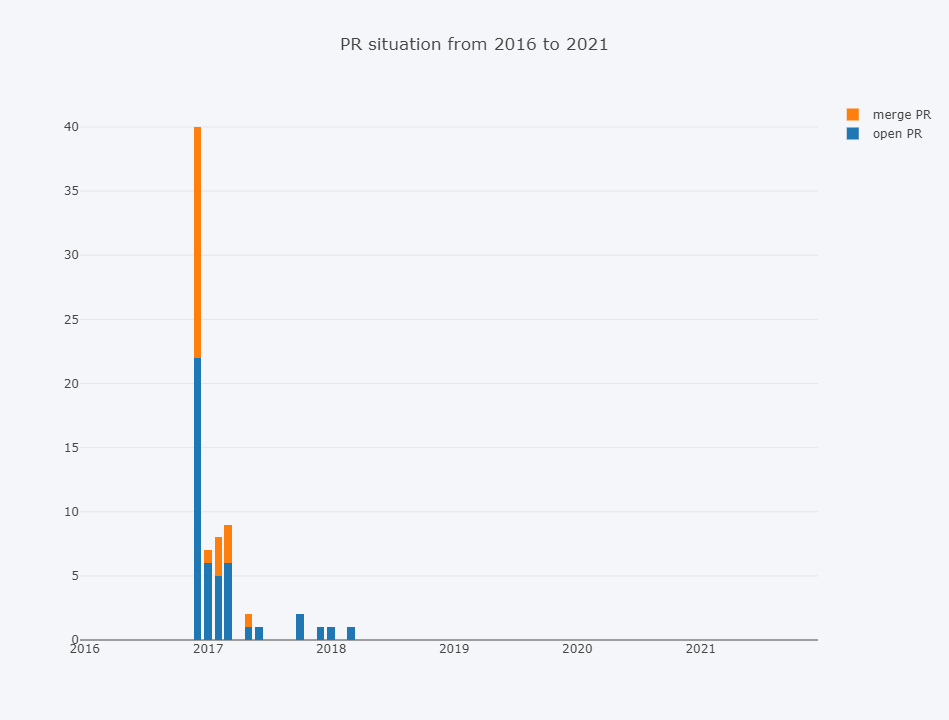

In [10]:
task_3.run()

In [11]:
async function test(){
    var data = await task_3.get_data(`SELECT *
               FROM github_log.year2016
               WHERE repo_name=${task_3.repo}
               AND type=${task_3.type}
               AND action=${task_3.close_action}`, only_one=false
         
        )
    // console.log(JSON.parse(data))
}
test();

task4

In [37]:
var task_4 = {
    repo: '\'openai/universe\'',
    type: '\'PullRequestEvent\'',
    open_action: '\'opened\'',
    close_action: '\'closed\'',
    reopen_action: '\'reopened\'',
    count: [],
    null_time: '\'197001\'',
    xData: [
      ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
      ],
    yData: [],
    colors: ['rgba(67,67,67,1)', 'rgba(115,115,115,1)'],
    generateData:function(xData, yData, colors){
        // console.log(xData, yData, colors)
        bar_1 = {
              x: xData[0],
              y: yData[0],
              name: 'active developer',
              type: 'bar'
        }
        return [bar_1]
    },
    generateLayout: function(xData){
        var layout = {
          title: 'the number of active developers from 2016 to 2021',
          barmode: 'stack',
          paper_bgcolor: 'rgba(245,246,249,1)',
          plot_bgcolor: 'rgba(245,246,249,1)',
          showlegend: true,
          annotations: []
        }
        return layout
    },
    draw: function(xData, yData, colors){
        openDigger.render.plotly(this.generateData(xData, yData, colors), this.generateLayout(xData))
    },
    get_data: async function(query_str, only_one=true){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        if(only_one){
            return JSON.stringify(res_data[0])
        }
        else{
            return JSON.stringify(res_data)
        }
        
    },
    run: async function(){
        for(let _year=2016; _year<=2021; _year++){
            for(let _month=1; _month<=12; _month++){
                var date = ''+_year
                if(_month < 10){
                    date += '0' + _month
                }
                else{
                    date += _month
                }
                // console.log(date)
                var data_actor = await task_4.get_data(
                  `SELECT count(*)  AS actor_cnt
                   FROM (
                       SELECT distinct actor_id
                       FROM github_log.year${_year}
                       WHERE repo_name=${this.repo} AND toYYYYMM(created_date)=${date})`
                    )
                var data_organization = await task_4.get_data(
                  `SELECT count(*)  AS organization_cnt
                   FROM (
                       SELECT distinct org_id
                       FROM github_log.year${_year}
                       WHERE repo_name=${this.repo} AND toYYYYMM(created_date)=${date})`
                    )

                this.count.push(Number.parseInt(JSON.parse(data_actor)['actor_cnt']) + 
                                Number.parseInt(JSON.parse(data_organization)['organization_cnt']))

                
            }
        }
        // console.log(this.count)
        // console.log(this.merge_count)
        this.yData = [this.count]
        this.draw(this.xData, this.yData, this.colors)
    }
}

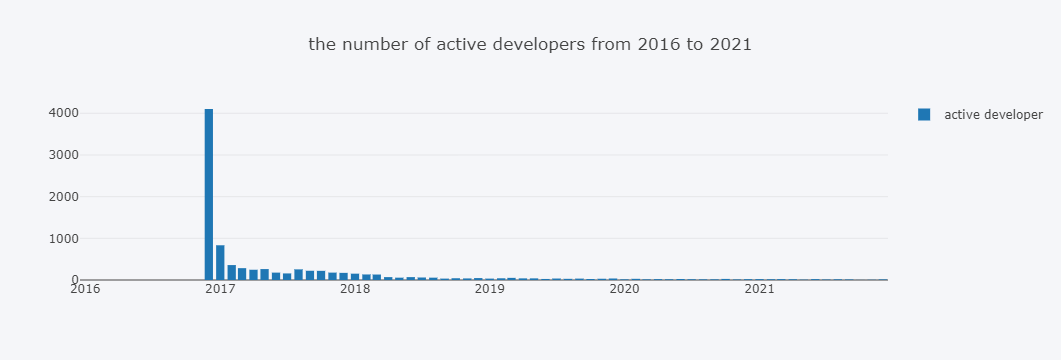

In [38]:
task_4.run()

Task5

In [156]:
var task_5 = {
    repo: '\'openai/universe\'',
    type: '\'IssuesEvent\'',
    issue_open_action: '\'opened\'',
    issue_close_action: '\'closed\'',
    time_: [],
    
    issue: {},
    day_stat: [],

    avg: function(day_stat) {
        var len = day_stat.length;
        var sum = 0;
        for(var i = 0; i < len ; i++){
            sum += day_stat[i];
        }
        return sum / len;
    },

    median: function(day_stat) {
        day_stat = day_stat.sort();
        var med = 0;
        if (day_stat.length % 2 == 0) {
            med = (day_stat[day_stat.length / 2] + day_stat[day_stat.length / 2 - 1]) / 2;
            } 
        else {
            med = day_stat[(day_stat.length + 1) / 2 - 1];
            }
        return med;
        
    },

    get_data: async function(query_str, only_one=false){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        if(only_one){
            return JSON.stringify(res_data[0])
        }
        else{
            return JSON.stringify(res_data)
        }
    },
    
    run: async function(){
        for(let _year=2016; _year<=2021; _year++){
            var data = await task_5.get_data( //toYYYYMMDD(issue_created_at), issue_closed_at  GROUP BY issue_id
                // `SELECT created_date, issue_id as id, toYYYYMMDD(issue_created_at) as start, toYYYYMMDD(issue_closed_at) as end
                //  FROM github_log.year${_year}
                //  WHERE repo_name=${this.repo} and 
                //        toYYYYMM(issue_created_at) != 197001`
                `SELECT issue_id as id, toUnixTimestamp(issue_created_at) as start, toUnixTimestamp(issue_closed_at) as end
                 FROM github_log.year${_year}
                 WHERE repo_name=${this.repo} and 
                       toUnixTimestamp(issue_created_at) != 0`

             )
            // console.log(data)

            data = JSON.parse(data)
            for(var i = 0; i < data.length; i++){
                if (this.issue[data[i]['id']] == null){
                    this.issue[data[i]['id']] = [data[i]['start'],]
                }
                if ((data[i]['end'] != '0') && (data[i]['end'] != this.issue[data[i]['id']][0])){
                    this.issue[data[i]['id']].push(data[i]['end'])
                }
            }
        }
        // console.log(this.issue)
        for (var key in this.issue) {
            if (this.issue[key].length > 1){
                this.day_stat.push(Math.floor((this.issue[key][1] - this.issue[key][0]) / 86400))
            }
        }
        // console.log(this.day_stat)
        console.log('平均天数：', this.avg(this.day_stat))
        console.log('中位数天数：', this.median(this.day_stat))
    }
}

In [159]:
task_5.run()

平均天数： 100.35622317596567
中位数天数： 16


In [12]:
var task_6 = {
    repo: '\'openai/universe\'',
    type: '\'PullRequestEvent\'',
    pr_open_action: '\'opened\'',
    pr_close_action: '\'closed\'',
    pr_reopen_action: '\'reopened\'',
    time_: [],
    
    issue: {},

    get_data: async function(query_str, only_one=false){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        if(only_one){
            return JSON.stringify(res_data[0])
        }
        else{
            return JSON.stringify(res_data)
        }
    },
    
    run: async function(){
        var data = await task_6.get_data(    `SELECT avg(time) as avg, quantile(0.5)(time) as medium FROM(        
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2016 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1        UNION ALL        
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2017 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1        UNION ALL        
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2018 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1        UNION ALL  
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2019 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1        UNION ALL  
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2020 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1        UNION ALL  
            SELECT toUnixTimestamp(pull_merged_at) - toUnixTimestamp(issue_created_at) AS time FROM github_log.year2021 WHERE repo_name=${this.repo} AND type=${this.type} AND action = 'closed' and pull_merged = 1 )`)
            data = JSON.parse(data)
            this.issue["avg"]=data[0]["avg"]/86400
            this.issue["medium"]=data[0]["medium"]/86400
        console.log('平均天数：', this.issue["avg"])
        console.log('中位数天数：', this.issue["medium"])
    }
}

In [13]:
task_6.run()

平均天数： 4.0631842058404555
中位数天数： 0.1557638888888889


In [14]:
var task_7 = {
    repo: '\'openai/universe\'',
    type: '\'PullRequestEvent\'',
    pr_open_action: '\'opened\'',
    pr_close_action: '\'closed\'',
    pr_reopen_action: '\'reopened\'',
    time_: [],
    
    issue: {},

    get_data: async function(query_str, only_one=false){
        var res_data
        await query(query_str).then(res => {
            res_data=res
            // console.log(res_data[0],typeof(res_data[0]))
        })
        if(only_one){
            return JSON.stringify(res_data[0])
        }
        else{
            return JSON.stringify(res_data)
        }
    },
    
    run: async function(){
        var data = await task_7.get_data( `SELECT avg(time) as avg, quantile(0.5)(time) as medium FROM (       
            SELECT toUnixTimestamp(min(issue_comment_created_at)) - toUnixTimestamp(min(issue_created_at)) AS time  FROM (                    
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2016 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id    UNION ALL            
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2017 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id    UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2018 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id    UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2019 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id    UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2020 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id    UNION ALL
            SELECT issue_id, issue_created_at, issue_comment_created_at FROM github_log.year2021 WHERE repo_name=${this.repo} AND issue_id<>0 AND issue_comment_author_id<>0 AND issue_comment_author_id<>issue_author_id)  GROUP BY issue_id    )`)
            data = JSON.parse(data)
            this.issue["avg"]=data[0]["avg"]/86400
            this.issue["medium"]=data[0]["medium"]/86400
        console.log('平均天数：', this.issue["avg"])
        console.log('中位数天数：', this.issue["medium"])
    }
}

In [15]:
task_7.run()

平均天数： 5.233358487654321
中位数天数： 0.20012152777777778


In [ ]:
第八题：从上面的七个问题中对star、fork、活跃开发者等统计中可以看出，从2016年12月star、fork、打开issue、pr打开和关闭数量激增，但在2018年以后开始归于平淡。
根据PR 从打开到合入的的平均时长可以看出pr合入较快，总体上2016年末项目活跃度最佳，此后17年逐渐递减，18、19、20、21基本没有 PR 合并，项目处于平淡时期。